# <center> Cas de tests, rendu 2 </center>

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mlt
import numpy as np

## Import Model Linear and MLP 

In [2]:
import sys  
sys.path.insert(0, '../../python')

from linearModel import linearModel
from mlp import MLPModel

## Create Model 

In [3]:
lm = linearModel()
mlp = MLPModel()

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
X = np.array([
      [2.5, 5],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

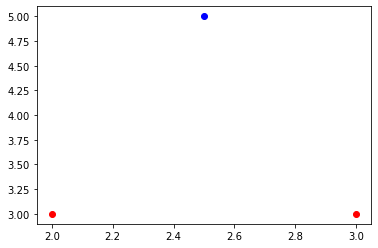

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear 

In [6]:
resultat = lm.create_linear_model(2)
model = resultat[0]
test_dataset = [[float(x1), float(x2)] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y,0.01,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['green' if label == 1 else 'orange' for label in predicted_outputs]


lm.destroy_linear_model(resultat)

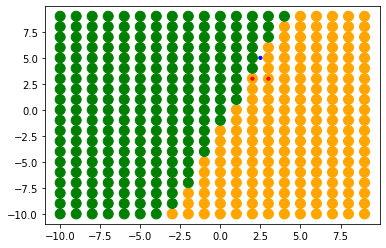

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors,s=100)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=10)
plt.show()
plt.clf()

#### Explication 
Pour pourvoir arriver a ce resultat tout d'abbord nous lui devons lui donner un input dim egale a l'entre du tableau, ici 2 car on rentre un tableau 2D. <br>
Ce qui est au niveau des Hyper-parametres nous lui donnons très peu d'epochs avec un learning rate faible car nous savons très bien que le dataset n'est pas très compliqué et ne demande pas beaucoup d'iterations.<br>
La sortie ressemble a cela car nous tracon une courbe qui se rapporhcxe le plus possible des points. <br>
L'algorithme calcule la distance entree chaque point pour la minimiser afin de separer le graph en 2. <br>
Quand cela est fait nous pouvons lancer une prediction est aisin colorié le graphe.

### MLP 

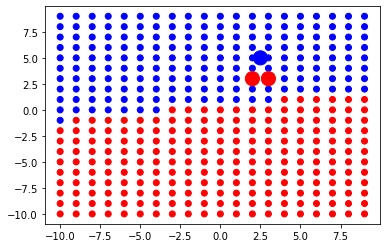

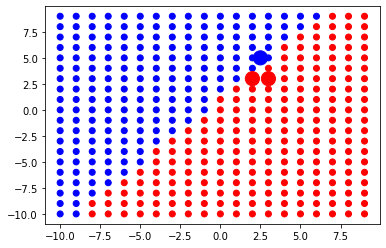

In [8]:
resultat3 = mlp.create_mlp_model([2,1])
model3 = resultat3[0]


test_dataset = [[x1 , x2 ] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.001,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

mlp.free_MLP(resultat3)

### MLP Simple 
Nous lui donnes 2 input layer car en entré nous avons 2 dataset.
Même principe que pour le modèle linéaire 2 inputs layaient pour un tableau 2d. Nous mettons 1 output pour la sortie car nous prédictions 2 classes 

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [9]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

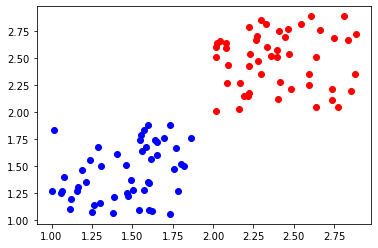

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### Linear 

In [11]:
resultat = lm.create_linear_model(2)
model = resultat[0]
test_dataset = [[float(x1)/5, float(x2)/5] for x1 in range(0, 20) for x2 in range(0, 20)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y, 0.001,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]

lm.destroy_linear_model(resultat)

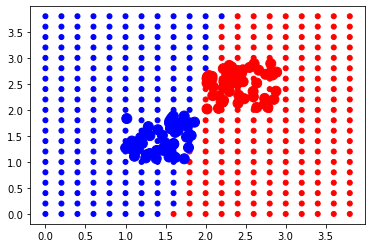

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=25)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()
plt.clf()

### MLP

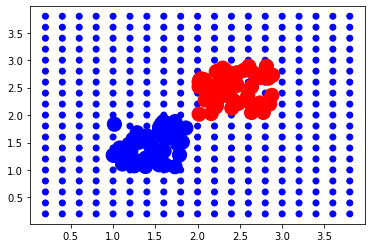

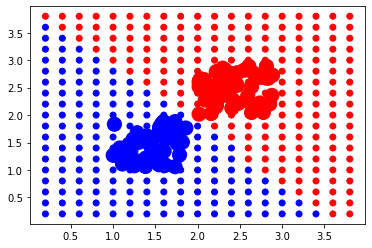

In [13]:
resultat3 = mlp.create_mlp_model([2,2,1])
model3 = resultat3[0]


test_dataset = [[float(x1)/5, float(x2)/5] for x1 in range(1, 20) for x2 in range(1, 20)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.001,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

mlp.free_MLP(resultat3)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [72]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

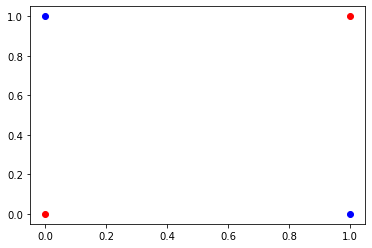

<Figure size 432x288 with 0 Axes>

In [73]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Linear 

In [16]:
resultat = lm.create_linear_model(2)
model = resultat[0]

test_dataset = [[float(x1)/10, float(x2)/10] for x1 in range(0, 15) for x2 in range(0, 15)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y, 0.001,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]

lm.destroy_linear_model(resultat)

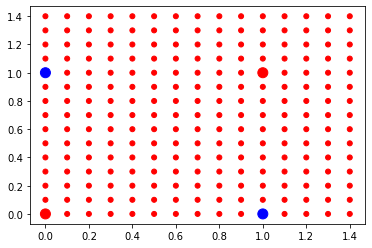

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=25)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()
plt.clf()

#### Explication 

Le xor pour un modèle linéaire n'est pas réalisable car il est impossible de le réparer linéairement en 2 parties.

#### Resolution du Xor 

In [18]:
dataset_0 = []
dataset_1 = []
x1 = 0
x2 = 0
Y_2 = []
Y_3 =[]

for i in range (0, len(X)):
    if X[i][0] > 0.5: 
        dataset_0.append([])
        dataset_0[x1].append(X[i][0])
        dataset_0[x1].append(X[i][1])
        x1 += 1
        Y_2.append(Y[i])
    else:
        dataset_1.append([])
        dataset_1[x2].append(X[i][0])
        dataset_1[x2].append(X[i][1])
        x2 += 1
        Y_3.append(Y[i])

In [19]:
resultat42 = lm.create_linear_model(2)
model42= resultat42[0]

resultat43 = lm.create_linear_model(2)
model43= resultat43[0]

test_dataset_1 = [[float(x1)/10 +0.5, float(x2)/5 ] for x1 in range(0, 7) for x2 in range(0, 7)]

colors_1 = ["green" if output >= 0 else "orange" for output in Y_2]

test_dataset_2 = [[float(x1)/10, float(x2)/5] for x1 in range(0, 7) for x2 in range(0, 7)]

colors_2 = ["green" if output >= 0 else "orange" for output in Y_3]

flattened_dataset_inputs_1 = []
for p in dataset_0:
    flattened_dataset_inputs_1.append(p[0])
    flattened_dataset_inputs_1.append(p[1])
    
    
flattened_dataset_inputs_2 = []
for p in dataset_1:
    flattened_dataset_inputs_2.append(p[0])
    flattened_dataset_inputs_2.append(p[1])

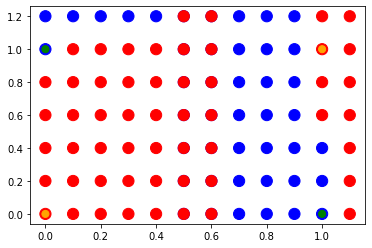

<Figure size 432x288 with 0 Axes>

In [20]:
lm.train_classification_rosenblatt_rule_linear_model(model42, flattened_dataset_inputs_1,
                                                        Y_2, 0.01,10000)

lm.train_classification_rosenblatt_rule_linear_model(model43, flattened_dataset_inputs_2,
                                                        Y_3, 0.01,10000)

predicted_outputs_1 = [lm.predict_linear_model_classification(model42, p) for p in test_dataset_1]
predicted_outputs_2 = [lm.predict_linear_model_classification(model43, p) for p in test_dataset_2]

predicted_outputs_colors_1 = ['blue' if label == 1 else 'red' for label in predicted_outputs_1]
predicted_outputs_colors_2 = ['blue' if label == 1 else 'red' for label in predicted_outputs_2]

plt.scatter([p[0] for p in test_dataset_1], [p[1] for p in test_dataset_1], c=predicted_outputs_colors_1, s=125)
plt.scatter([p[0] for p in test_dataset_2], [p[1] for p in test_dataset_2], c=predicted_outputs_colors_2, s=125)
plt.scatter([p[0] for p in dataset_0], [p[1] for p in dataset_0], c=colors_1, s=50)
plt.scatter([p[0] for p in dataset_1], [p[1] for p in dataset_1], c=colors_2, s=50)

plt.show()
plt.clf()

lm.destroy_linear_model(resultat42)
lm.destroy_linear_model(resultat43)

### MLP 

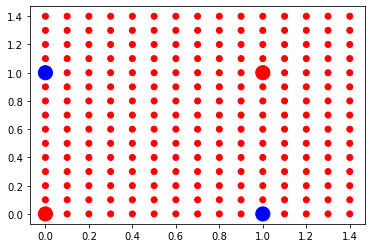

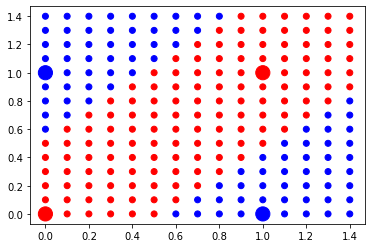

In [74]:
resultat3 = mlp.create_mlp_model([2,2,1])
model3 = resultat3[0]


test_dataset = [[float(x1)/10, float(x2)/10] for x1 in range(0, 15) for x2 in range(0, 15)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.01,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

mlp.free_MLP(resultat3)

#### Explication 

Si nous mettions pas de couche cachée notre modèle ressemblerait à un modèle linéaire où il classera les données par une simple ligne en répondant à la question oui ou non. <br>
Un seul neurone représente une seule fonction qui peut diviser l'espace des fonctions en deux parties <br>
Pour notre mode XOR nous avons besoin d'une couche cache avec au moins 2 neurone. <br>
Si nous n'avons qu'un seul neurone caché, cela produira toujours une représentation erronée.

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [22]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

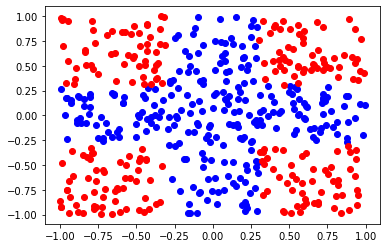

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Linear

In [24]:
resultat = lm.create_linear_model(2)
model = resultat[0]

test_dataset = [[float(x1)/20, float(x2)/20] for x1 in range(-25, 25) for x2 in range(-25, 25)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y, 0.001,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]

lm.destroy_linear_model(resultat)

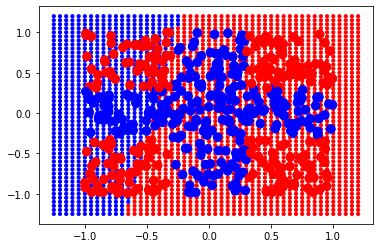

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=75)
plt.show()
plt.clf()

#### Explication 

Même problème que pour le XOR, le modèle linéaire n'arrive pas à séparer le dataset en deux partir de façon linéairement

### Resolution du cross 

In [26]:
dataset_0 = []
dataset_1 = []
dataset_2 = []
x1 = 0
x2 = 0
Y_2 = []
Y_3 =[]
Y_4 = []

for i in range (0, len(X)):
    if X[i][0] > 0 and X[i][1] > 0:  
        dataset_0.append([])
        dataset_0[x1].append(X[i][0])
        dataset_0[x1].append(X[i][1])
        x1 += 1
        Y_2.append(Y[i])

x1 = 0 
for i in range(0,len(dataset_0)):
    if dataset_0[i][0] >= 0.3:
        dataset_1.append([])
        dataset_1[x1].append(dataset_0[i][0])
        dataset_1[x1].append(dataset_0[i][1])
        x1 += 1
        Y_3.append(Y_2[i])
    if dataset_0[i][1] >= 0.3:
        dataset_2.append([])
        dataset_2[x2].append(dataset_0[i][0])
        dataset_2[x2].append(dataset_0[i][1])
        x2 += 1
        Y_4.append(Y_2[i])

In [27]:
resultat52 = lm.create_linear_model(2)
model52= resultat52[0]

resultat53 = lm.create_linear_model(2)
model53= resultat53[0]

test_dataset_1 = [[float(x1)/11, float(x2)/11 ] for x1 in range(-2, 12) for x2 in range(-2, 12)]
colors_1 = ["green" if output >= 0 else "orange" for output in Y_2]

test_dataset_2 = [[float(x1)/11, float(x2)/11] for x1 in range(-2, 12) for x2 in range(-2, 12)]

colors_2 = ["green" if output >= 0 else "orange" for output in Y_3]

colors_3 = ["green" if output >= 0 else "orange" for output in Y_4]

test_dataset_1 = np.array(test_dataset_1)
test_dataset_2 = np.array(test_dataset_2)

test_dataset_4 = test_dataset_1 * test_dataset_2

flattened_dataset_inputs_1 = []
for p in dataset_1:
    flattened_dataset_inputs_1.append(p[0])
    flattened_dataset_inputs_1.append(p[1])
    
    
flattened_dataset_inputs_2 = []
for p in dataset_2:
    flattened_dataset_inputs_2.append(p[0])
    flattened_dataset_inputs_2.append(p[1])

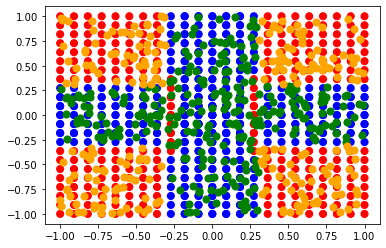

<Figure size 432x288 with 0 Axes>

In [28]:
lm.train_classification_rosenblatt_rule_linear_model(model52, flattened_dataset_inputs_1,
                                                        Y_3, 0.01,10000)

lm.train_classification_rosenblatt_rule_linear_model(model53, flattened_dataset_inputs_2,
                                                       Y_4, 0.01,10000)


predicted_outputs_1 = [lm.predict_linear_model_classification(model52, p) for p in test_dataset_1]
predicted_outputs_2 = [lm.predict_linear_model_classification(model53, p) for p in test_dataset_2]
predicted_outputs_3 = []
predicted_outputs_4 = []


test_dataset_3 = []
x1 = 0 
for i in range(0,len(test_dataset_1)):
    if test_dataset_1[i][0] >= 0.3:
        test_dataset_3.append([])
        test_dataset_3[x1].append(test_dataset_1[i][0])
        test_dataset_3[x1].append(test_dataset_1[i][1])
        x1 += 1
        predicted_outputs_3.append(predicted_outputs_1[i])
        
test_dataset_4 = []
x1 = 0 
for i in range(0,len(test_dataset_2)):
    if test_dataset_2[i][0] < 0.3:
        test_dataset_4.append([])
        test_dataset_4[x1].append(test_dataset_2[i][0])
        test_dataset_4[x1].append(test_dataset_2[i][1])
        x1 += 1
        predicted_outputs_4.append(predicted_outputs_2[i])
        
        

predicted_outputs_colors_1 = ['blue' if label == 1 else 'red' for label in predicted_outputs_3] 
predicted_outputs_colors_2 = ['blue' if label == 1 else 'red' for label in predicted_outputs_4]


plt.scatter([p[0] for p in test_dataset_3], [p[1] for p in test_dataset_3], c=predicted_outputs_colors_1, s=50)
plt.scatter([p[0] for p in test_dataset_4], [p[1] for p in test_dataset_4], c=predicted_outputs_colors_2, s=50)

plt.scatter([p[0]*(-1) for p in test_dataset_3], [p[1] for p in test_dataset_3], c=predicted_outputs_colors_1, s=50)
plt.scatter([p[0]*(-1) for p in test_dataset_4], [p[1] for p in test_dataset_4], c=predicted_outputs_colors_2, s=50)

plt.scatter([p[0] for p in test_dataset_3], [p[1]*(-1) for p in test_dataset_3], c=predicted_outputs_colors_1, s=50)
plt.scatter([p[0] for p in test_dataset_4], [p[1]*(-1) for p in test_dataset_4], c=predicted_outputs_colors_2, s=50)

plt.scatter([p[0]*(-1) for p in test_dataset_3], [p[1]*(-1) for p in test_dataset_3], c=predicted_outputs_colors_1, s=50)
plt.scatter([p[0]*(-1) for p in test_dataset_4], [p[1]*(-1) for p in test_dataset_4], c=predicted_outputs_colors_2, s=50)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='green', s=50)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='orange', s=50)

plt.show()
plt.clf()

lm.destroy_linear_model(resultat52)
lm.destroy_linear_model(resultat53)

### MLP

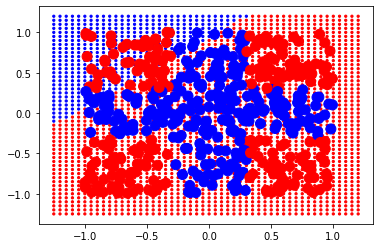

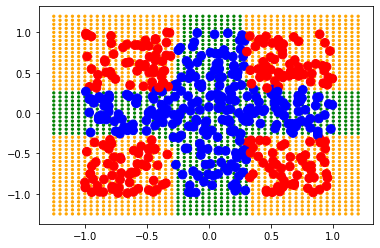

In [29]:
resultat3 = mlp.create_mlp_model([2,4,1])
model3 = resultat3[0]


test_dataset = [[float(x1)/20, float(x2)/20] for x1 in range(-25, 25) for x2 in range(-25, 25)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=5)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.01,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['green' if label >= 0 else 'orange' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=5)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=75)
plt.show()

mlp.free_MLP(resultat3)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [30]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0] for p in X])

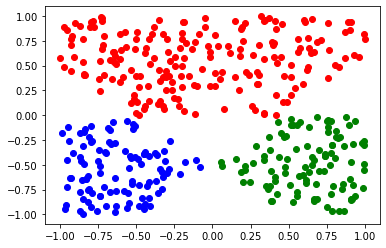

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

#### Explication 

### Linear 

In [32]:
resultat4 = lm.create_linear_model(2)
model4 = resultat4[0]

resultat5 = lm.create_linear_model(2)
model5 = resultat5[0]

resultat6 = lm.create_linear_model(2)
model6 = resultat6[0]

test_dataset = [[float(x1)/20, float(x2)/20] for x1 in range(-25, 25) for x2 in range(-25, 25)]

flattened_dataset_inputs_blue_to_red = []
flattened_dataset_inputs_blue_to_green = []
flattened_dataset_inputs_red_to_green = []

# for p in X:  
#     if(p[0] > 0):
#         flattened_dataset_inputs_red_to_green.append(p[0])
#         flattened_dataset_inputs_red_to_green.append(p[1])
        
#     if(p[0] < 0):
#         flattened_dataset_inputs_blue_to_red.append(p[0])
#         flattened_dataset_inputs_blue_to_red.append(p[1])
        
#     if(p[1] < 0):
#         flattened_dataset_inputs_blue_to_green.append(p[0])
#         flattened_dataset_inputs_blue_to_green.append(p[1])
    
for i in np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X))))):
    flattened_dataset_inputs_blue_to_red.append(i[0])
    flattened_dataset_inputs_blue_to_red.append(i[1])
    
for i in np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X))))):
    flattened_dataset_inputs_blue_to_red.append(i[0])
    flattened_dataset_inputs_blue_to_red.append(i[1])
    


# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')

flattened_dataset_outputs_blue_to_red = []
flattened_dataset_outputs_blue_to_green = []
flattened_dataset_outputs_red_to_green = []
for p in Y:
    if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0:
        flattened_dataset_outputs_blue_to_red.append(p[0])
        flattened_dataset_outputs_blue_to_red.append(p[1])
        flattened_dataset_outputs_blue_to_red.append(p[2])
        
        flattened_dataset_outputs_blue_to_green.append(p[0])
        flattened_dataset_outputs_blue_to_green.append(p[1])
        flattened_dataset_outputs_blue_to_green.append(p[2])
        
    elif -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 :
        flattened_dataset_outputs_blue_to_green.append(p[0])
        flattened_dataset_outputs_blue_to_green.append(p[1])
        flattened_dataset_outputs_blue_to_green.append(p[2])
        
        flattened_dataset_outputs_red_to_green.append(p[0])
        flattened_dataset_outputs_red_to_green.append(p[1])
        flattened_dataset_outputs_red_to_green.append(p[2])
        
    elif -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 : 
        flattened_dataset_outputs_blue_to_red.append(p[0])
        flattened_dataset_outputs_blue_to_red.append(p[1])
        flattened_dataset_outputs_blue_to_red.append(p[2])
        
        flattened_dataset_outputs_red_to_green.append(p[0])
        flattened_dataset_outputs_red_to_green.append(p[1])
        flattened_dataset_outputs_red_to_green.append(p[2])

#### Blue to red 

In [33]:
lm.train_classification_rosenblatt_rule_linear_model(model6, flattened_dataset_inputs_blue_to_red,
                                                      flattened_dataset_outputs_blue_to_red, 0.01,100000)


predicted_outputsBlueToRed = [lm.predict_linear_model_classification(model6, p) for p in test_dataset]

lm.destroy_linear_model(resultat6)

#### Red to green 

####  Blue to green

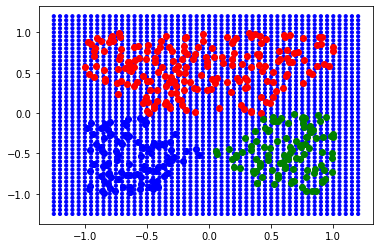

<Figure size 432x288 with 0 Axes>

In [34]:
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputsBlueToRed]


plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### MLP

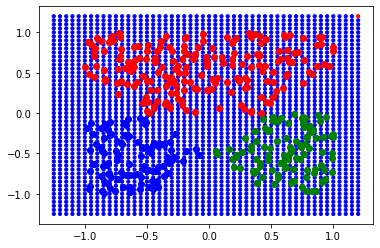

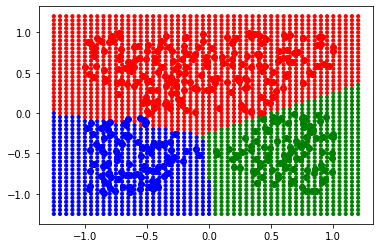

<Figure size 432x288 with 0 Axes>

In [35]:
resultat7 = mlp.create_mlp_model([2,3])
model7 = resultat7[0]

test_dataset = [[float(x1) / 20, float(x2) / 20] for x1 in range(-25, 25) for x2 in range(-25, 25)]

predicted_outputs = [mlp.predict_mlp_model_classification(model7, p) for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputs]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in Y:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])

mlp.train_classification_stochastic_gradient_backpropagation(model7,
                                                             flattened_dataset_inputs,
                                                             flattened_dataset_outputs,
                                                             alpha=0.01,
                                                             iterations_count=10000)


predicted_outputs = [mlp.predict_mlp_model_classification(model7, p) for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputs]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()


mlp.free_MLP(resultat7)

#### Explication 

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [36]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

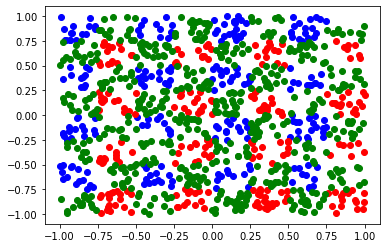

<Figure size 432x288 with 0 Axes>

In [37]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### MLP 

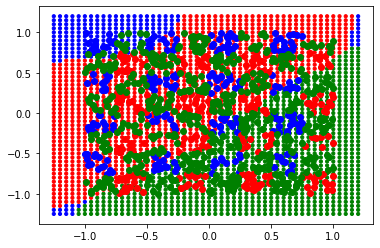

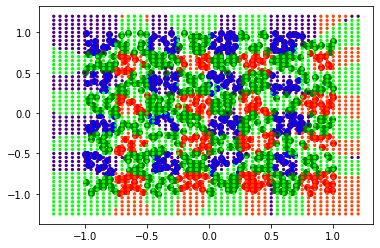

<Figure size 432x288 with 0 Axes>

In [38]:
resultat8 = mlp.create_mlp_model([2,25,25,3])
model8 = resultat8[0]

test_dataset = [[float(x1) / 20, float(x2) / 20] for x1 in range(-25, 25) for x2 in range(-25, 25)]

predicted_outputs = [mlp.predict_mlp_model_classification(model8, p) for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputs]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in Y:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])

mlp.train_classification_stochastic_gradient_backpropagation(model8,
                                                             flattened_dataset_inputs,
                                                             flattened_dataset_outputs,
                                                             alpha=0.01,
                                                             iterations_count=2000000)

predicted_outputs = [mlp.predict_mlp_model_classification(model8, p) for p in test_dataset]
predicted_outputs_colors = ["indigo" if np.argmax(output) == 0 else ("orangered" if np.argmax(output) == 1 else "lime") for
                            output in predicted_outputs]
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=5)
plt.show()
plt.clf()

#plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=5)
#plt.show()
#plt.clf()

mlp.free_MLP(resultat8)

## <center> Régression </center>

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [39]:
X = np.array([
      [-4],
      [2]
])
Y = np.array([
      2,
      3
])

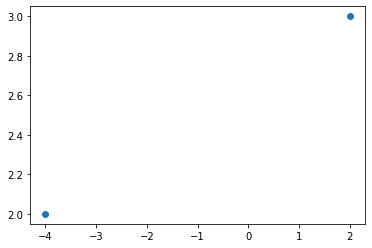

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear

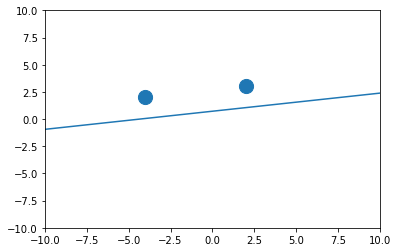

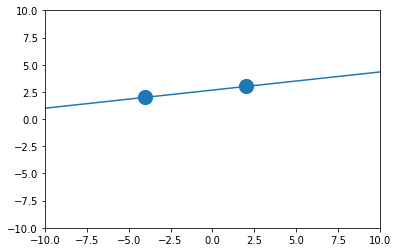

In [41]:
resultat2 = lm.create_linear_model(2)
model2 = resultat2[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model2, [p]) for p in test_dataset_inputs]


plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.train_regression_pseudo_inverse_linear_model(model2, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model2, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.destroy_linear_model(resultat2)

#### Explication 

Le but de la régression linéaire est de déterminer une fonction linéaire entre les variables X et Y qui décrit le mieux la relation. L'erreur entre la courbe et les points doit être le minimal possible. <br>
C'est pour cela qu'en sortie nous avons une courbe passante tout proche des deux points. 


### MLP 

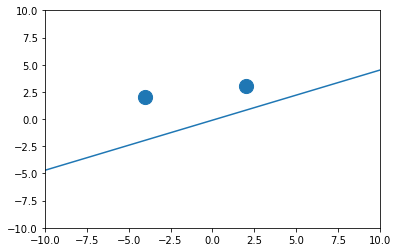

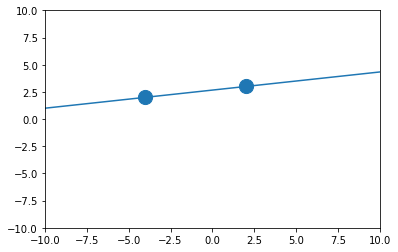

In [42]:
resultat5 = mlp.create_mlp_model([1,1])
model5 = resultat5[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model5, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.train_regression_stochastic_gradient_backpropagation(model5,
                                                               flattened_dataset_inputs,
                                                               Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model5, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.free_MLP(resultat5)

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [43]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

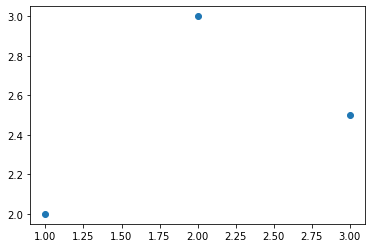

<Figure size 432x288 with 0 Axes>

In [44]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear 

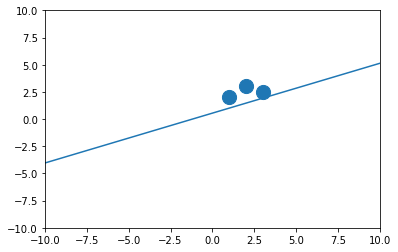

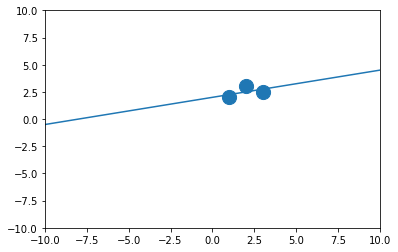

In [45]:
resultat10 = lm.create_linear_model(2)
model10 = resultat10[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model10, [p]) for p in test_dataset_inputs]


plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.train_regression_pseudo_inverse_linear_model(model10, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model10, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.destroy_linear_model(resultat10)

#### Explication 

### MLP 

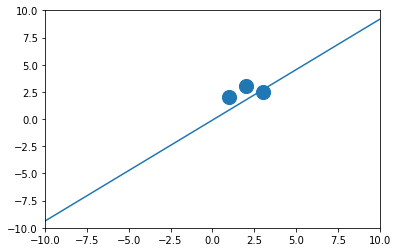

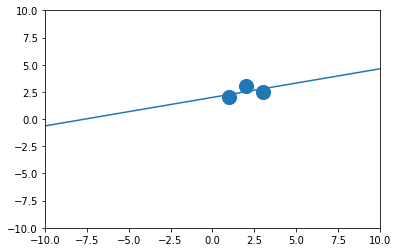

In [46]:
resultat11 = mlp.create_mlp_model([1,1])
model11 = resultat11[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model11, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.train_regression_stochastic_gradient_backpropagation(model11,
                                                               flattened_dataset_inputs,
                                                               Y)


test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model11, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.free_MLP(resultat11)

#### Explication 

1 seule couche caché d'un seul neurone est nécessaire pour que notre régression linéaire passe par tous les points. <br>
Nous pouvons en mettre plus mais cela n'est pas nécessaire car notre dataset n'est pas remplie en matière de données 

### Test avec plus de points

In [47]:
X = np.array([
    [1],
    [2],
    [3],
    [1.25],
    [1.75],
    [1.75],
    [5],
    [7.5]
])
Y = np.array([
    2,
    3,
    2.5,
    2.4,
    2.4,
    2.6,
    -5,
    0
])



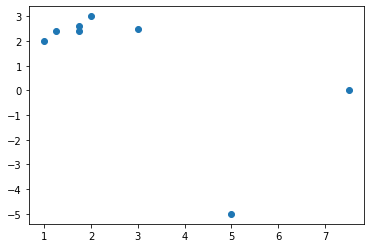

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(X,Y)
plt.show()
plt.clf()

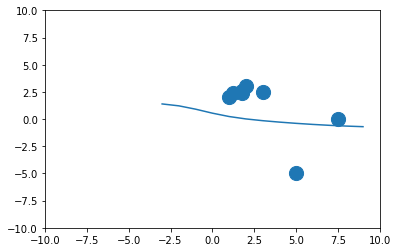

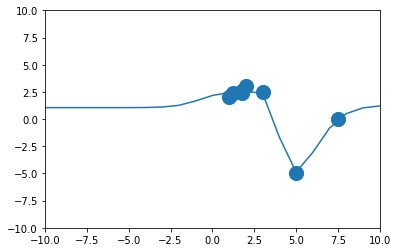

In [49]:
resultat11 = mlp.create_mlp_model([1,3,1])
model11 = resultat11[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-3, 10)]
predicted_outputs = [mlp.predict_mlp_model_regression(model11, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.train_regression_stochastic_gradient_backpropagation(model11,
                                                               flattened_dataset_inputs,
                                                               Y)


test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model11, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.free_MLP(resultat11)

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [50]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

[1 2 1]


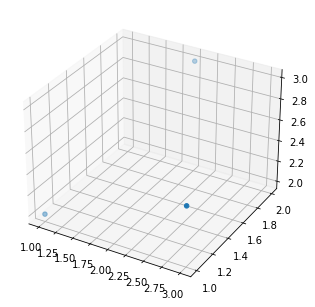

In [51]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
print(X[:,1])

### Linear 

x_surf 
 [[1 2 3]
 [1 2 3]
 [1 2 3]] 
 y_surf 
 [[1 1 1]
 [2 2 2]
 [1 1 1]]
Je suis le predicted_outputs [0.634687066078186, 0.5585184097290039, 0.4823497533798218, 0.40618109703063965, 0.3300124406814575, 0.2538437843322754, 0.17767512798309326, 0.10150647163391113, 0.025337815284729004, -0.050830841064453125, -0.12699949741363525, -0.20316815376281738, -0.2793368101119995, -0.35550546646118164, -0.43167412281036377, -0.5078427791595459, -0.584011435508728, -0.6601800918579102, -0.7363487482070923, -0.8125174045562744, -0.8886860609054565]


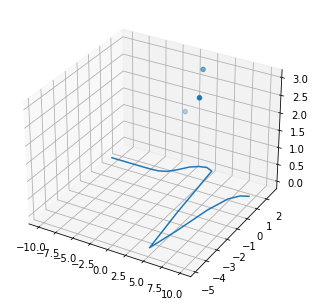

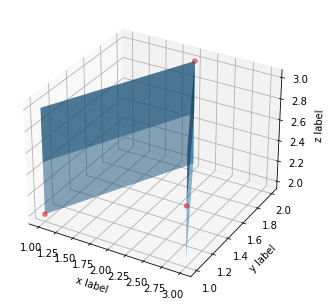

In [52]:
resultat12 = lm.create_linear_model(2)
model12 = resultat12[0]

x_surf, y_surf = np.meshgrid(X[:,0],X[:,1])
print("x_surf \n",x_surf,"\n","y_surf \n",y_surf)

Y2 = np.array([[
      2],
      [3],
      [2.5]
])

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot(test_dataset_inputs, predicted_outputs)


predicted_outputs = [lm.predict_linear_model_regression(model12, [p]) for p in test_dataset_inputs]
out = np.array(predicted_outputs)

print("Je suis le predicted_outputs",predicted_outputs)


fig = plt.figure()
ax = Axes3D(fig)


ax.plot_surface(X[:,0],X[:,1],Y2,alpha=0.5)
ax.scatter(X[:,0],X[:,1],Y2, c="red",marker='o', alpha=0.5)

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')

lm.destroy_linear_model(resultat12)

### MLP 

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [53]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

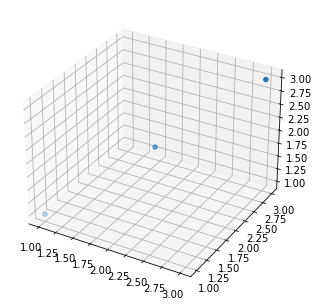

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
# plt.show()
# plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [55]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

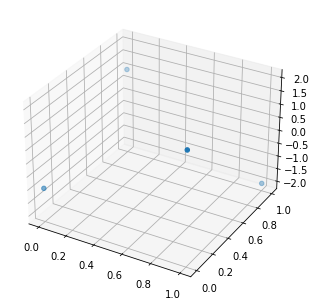

<Figure size 432x288 with 0 Axes>

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# <center> Save and Load </center>

## Classificiation 

### Linear Model 

#### Save 

In [57]:
dataset_inputs_classification_linear = [
    [1, 1],
    [2, 3],
    [3, 3]
]

dataset_expected_outputs_classification_linear = [
    1,
    -1,
    -1
]

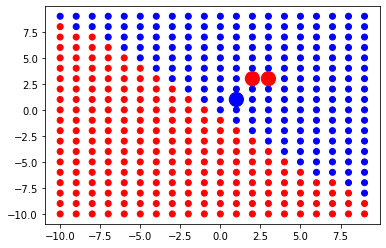

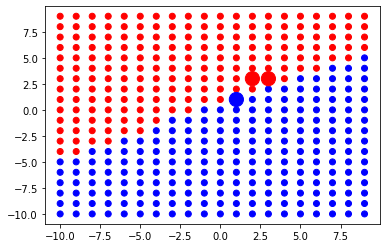

In [58]:
resultat = lm.create_linear_model(2)
model = resultat[0]

test_dataset = [[float(x1), float(x2)] for x1 in range(-10, 10) for x2 in range(-10, 10)]

colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs_classification_linear]

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs_classification_linear ], [p[1] for p in dataset_inputs_classification_linear ], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs_classification_linear :
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                         dataset_expected_outputs_classification_linear, 0.002, 10200)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs_classification_linear ], [p[1] for p in dataset_inputs_classification_linear ], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs_classification_linear :
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

#lm.save_linear_model_classification(model)

lm.destroy_linear_model(resultat)

#### Load 

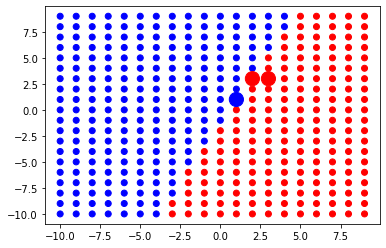

In [59]:
resultat1 = lm.load_linear_model("../../Save/linear_model_classification_2021718164115.json")
model1 = resultat1[0]

test_dataset = [[float(x1), float(x2)] for x1 in range(-10, 10) for x2 in range(-10, 10)]

colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs_classification_linear]


flattened_dataset_inputs = []
for p in dataset_inputs_classification_linear:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])


predicted_outputs = [lm.predict_linear_model_classification(model1, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs_classification_linear], [p[1] for p in dataset_inputs_classification_linear], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs_classification_linear:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.destroy_linear_model(resultat1)

### MLP 

#### Save 

In [69]:
dataset_inputs = [
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0],
]

dataset_expected_outputs = [
    -1,
    -1,
    1,
    1,
]

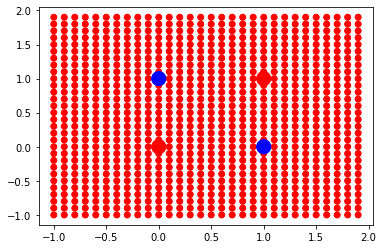

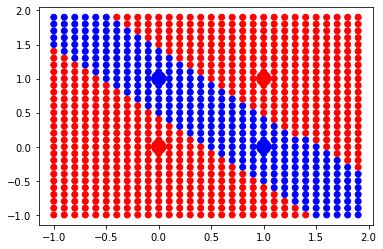

In [70]:
resultat2 = mlp.create_mlp_model([2, 2, 1])
model2 = resultat2[0]

test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

predicted_outputs = [mlp.predict_mlp_model_classification(model2, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model2,
                                                             flattened_dataset_inputs,
                                                             dataset_expected_outputs,
                                                             alpha=0.01,
                                                             iterations_count=1000000)

predicted_outputs = [mlp.predict_mlp_model_classification(model2, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

# mlp.save_mlp_classification(model3)

mlp.free_MLP(resultat2)

#### Load 

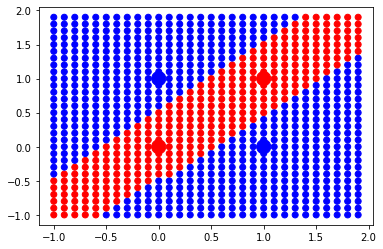

In [62]:
resultat3 = mlp.load_mlp_model("../../Save/mlp_classification_2_2_1_202171816367.json")
model3 = resultat3[0]

test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

mlp.free_MLP(resultat3)

## Test 2 -> Regression

### Model linear 

In [63]:
dataset_inputs = [
    [-5],
    [4],
    [4]

]

dataset_expected_outputs = [
    5.2,
    7,
    8.5
]

#### Save 

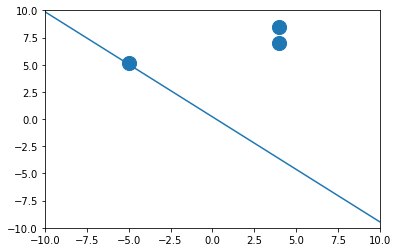

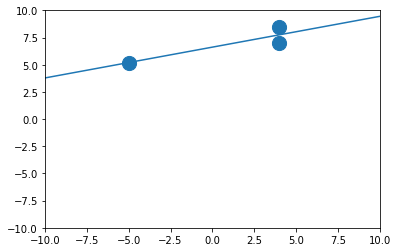

In [64]:
resultat4 = lm.create_linear_model(2)
model4 = resultat4[0]

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model4, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.train_regression_pseudo_inverse_linear_model(model4, flattened_dataset_inputs, dataset_expected_outputs)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model4, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

# lm.save_linear_model_regression(model4)

lm.destroy_linear_model(resultat4)


#### Load 

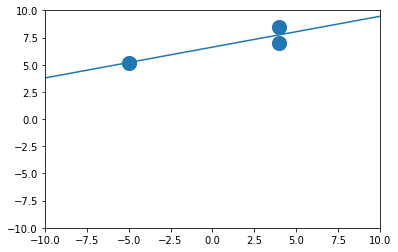

In [65]:
resultat5 = lm.load_linear_model("../../Save/linear_model_regression_2021718163838.json")
model5 = resultat5[0]

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model5, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.destroy_linear_model(resultat5)

### MLP 

In [66]:
dataset_inputs = [
    [-5],
    [4],
    [6],
]

dataset_expected_outputs = [
    1.2,
    7,
    8.3
]

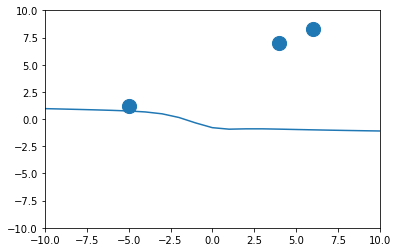

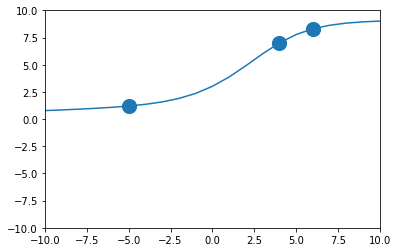

In [67]:
resultat6 = mlp.create_mlp_model([1, 3, 1])

model6 = resultat6[0]

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model6, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.train_regression_stochastic_gradient_backpropagation(model6,
                                                         flattened_dataset_inputs,
                                                         dataset_expected_outputs)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model6, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

# mlp.save_mlp_regression(model6)

mlp.free_MLP(resultat6)

#### Load 

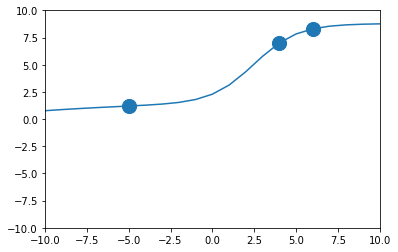

In [68]:
resultat7 = mlp.load_mlp_model("../../Save/mlp_regression_1_3_1_202171816358.json")
model7 = resultat7[0]

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model7, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.free_MLP(resultat7)